In [72]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization

In [73]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [74]:
X_test.shape

(10000, 28, 28)

In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [90]:
X_train = X_train / 255.0
X_test = X_test / 255.0

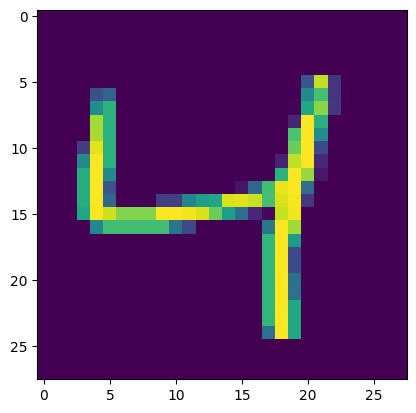

In [91]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()

In [92]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [93]:


model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
# 5️⃣ EarlyStopping callback

early_stop = EarlyStopping(
    monitor='val_loss',   # stop when validation loss stops improving
    patience=3,           # wait 3 epochs before stopping
    restore_best_weights=True
)


In [95]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,170 (922.54 KB)

 Trainable params: 235,658 (920.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [96]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [97]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8495 - loss: 0.4816 - val_accuracy: 0.9619 - val_loss: 0.1317
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9420 - loss: 0.1869 - val_accuracy: 0.9639 - val_loss: 0.1184
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9539 - loss: 0.1465 - val_accuracy: 0.9703 - val_loss: 0.0967
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9607 - loss: 0.1239 - val_accuracy: 0.9731 - val_loss: 0.0921
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9644 - loss: 0.1154 - val_accuracy: 0.9767 - val_loss: 0.0843
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9658 - loss: 0.1116 - val_accuracy: 0.9769 - val_loss: 0.0764
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9716 - loss: 0.0913 - val_accuracy: 0.9758 - val_loss: 0.0848
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9693 - loss: 0.0971 - 

In [83]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [84]:
y_pred = y_prob.argmax(axis=1)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9809

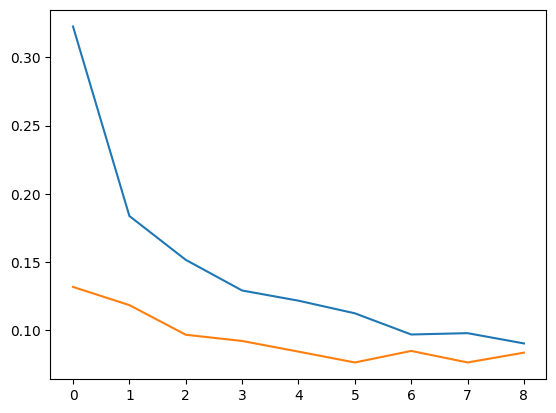

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

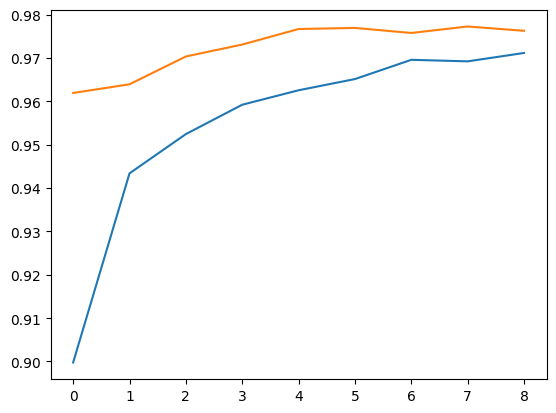

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

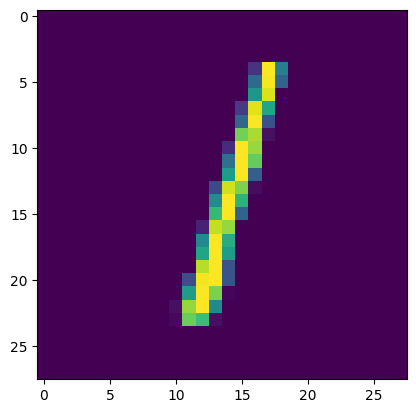

In [103]:
plt.imshow(X_test[2])

In [108]:
# Predict first 10 images
predictions = [model.predict(X_test[i].reshape(1,28,28)).argmax(axis=1)[0] for i in range(10)]
actual_labels = y_test[:10]

# If you used one-hot encoding, convert to integers
import numpy as np
if actual_labels.ndim > 1:  # one-hot encoded
    actual_labels = np.argmax(actual_labels, axis=1)

# Display side by side
for i in range(10):
    print(f"Image {i}: Predicted = {predictions[i]}, Actual = {actual_labels[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image 0: Predicted = 7, Actual = 7
Image 1: Predicted = 2, Actual = 2
Image 2: Predicted = 1, Actual = 1
Image 3: Predicted = 0, Actual = 0
Image 4: Predicted = 4, Actual = 4
Image 5: Predicted = 1, Actual = 1
Image 6: Predicted = 4, Actual = 4
Image 7: Predicted = 9, Actual = 9
Image 8: Predicted = 5, Actual = 5
Image 9: Predicted = 9, Actual = 9


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [110]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # integer labels
    metrics=['accuracy']
)


In [111]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)


In [112]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8348 - loss: 0.5379 - val_accuracy: 0.9606 - val_loss: 0.1285 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9488 - loss: 0.1696 - val_accuracy: 0.9693 - val_loss: 0.1003 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9590 - loss: 0.1330 - val_accuracy: 0.9745 - val_loss: 0.0851 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9673 - loss: 0.1079 - val_accuracy: 0.9736 - val_loss: 0.0870 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9690 - loss: 0.0977 - val_accuracy: 0.9789 - val_loss: 0.0712 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9734 - loss: 0.0848 - val_accuracy: 0.9780 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9725 - loss: 0.0826 - 

In [113]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9809 - loss: 0.0713
Test Accuracy: 0.9843000173568726
